In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')

# Predicting the Truckee River Flow

![](https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/fall-on-the-truckee-river-vance-fox.jpg)


The Truckee River relies on snow that falls in the Sierra Nevada during the winter months, and natural run-off combined with releases of water from Lake Tahoe and other reservoirs during the summer months to maintain flows that support water consumption needs.

![image.png](https://tmwa.com/images/riversystem_map.gif)

## Data

Assumptions
conservation of mass
    - input rivers should add up to river output (pending no small streams, snowmelt, rain)
precipitation can either add to or not effect river flow. 
    - if temperatue is low, rain is snow
    - Large rain storms lead to snow melt, feeding the river

In [2]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret[n - 1:] /= n
    return ret

df = pd.read_pickle('./data/clean_data.pkl')

In [3]:
df.head()

,time,truckee,tahoe,donner,boca,rain,snow,temp
0,1.483229e+18,12.14928,0.597552,2.588448,0.770304,2.5,94.0,-1.8
1,1.483315e+18,11.61120,0.230525,2.319408,0.775968,15.2,109.2,-5.0
2,1.483402e+18,11.04480,0.045312,2.225952,0.775968,35.6,144.8,-1.0
3,1.483488e+18,14.64144,0.300192,2.293920,0.265358,66.0,221.0,1.0
4,1.483574e+18,16.45392,0.348336,2.319408,0.003398,7.6,228.6,-4.0


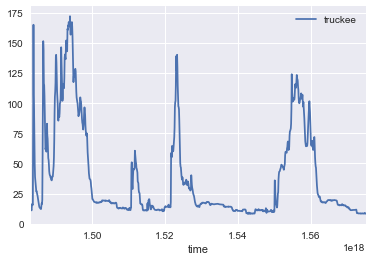

In [4]:
df.plot('time', 'truckee')

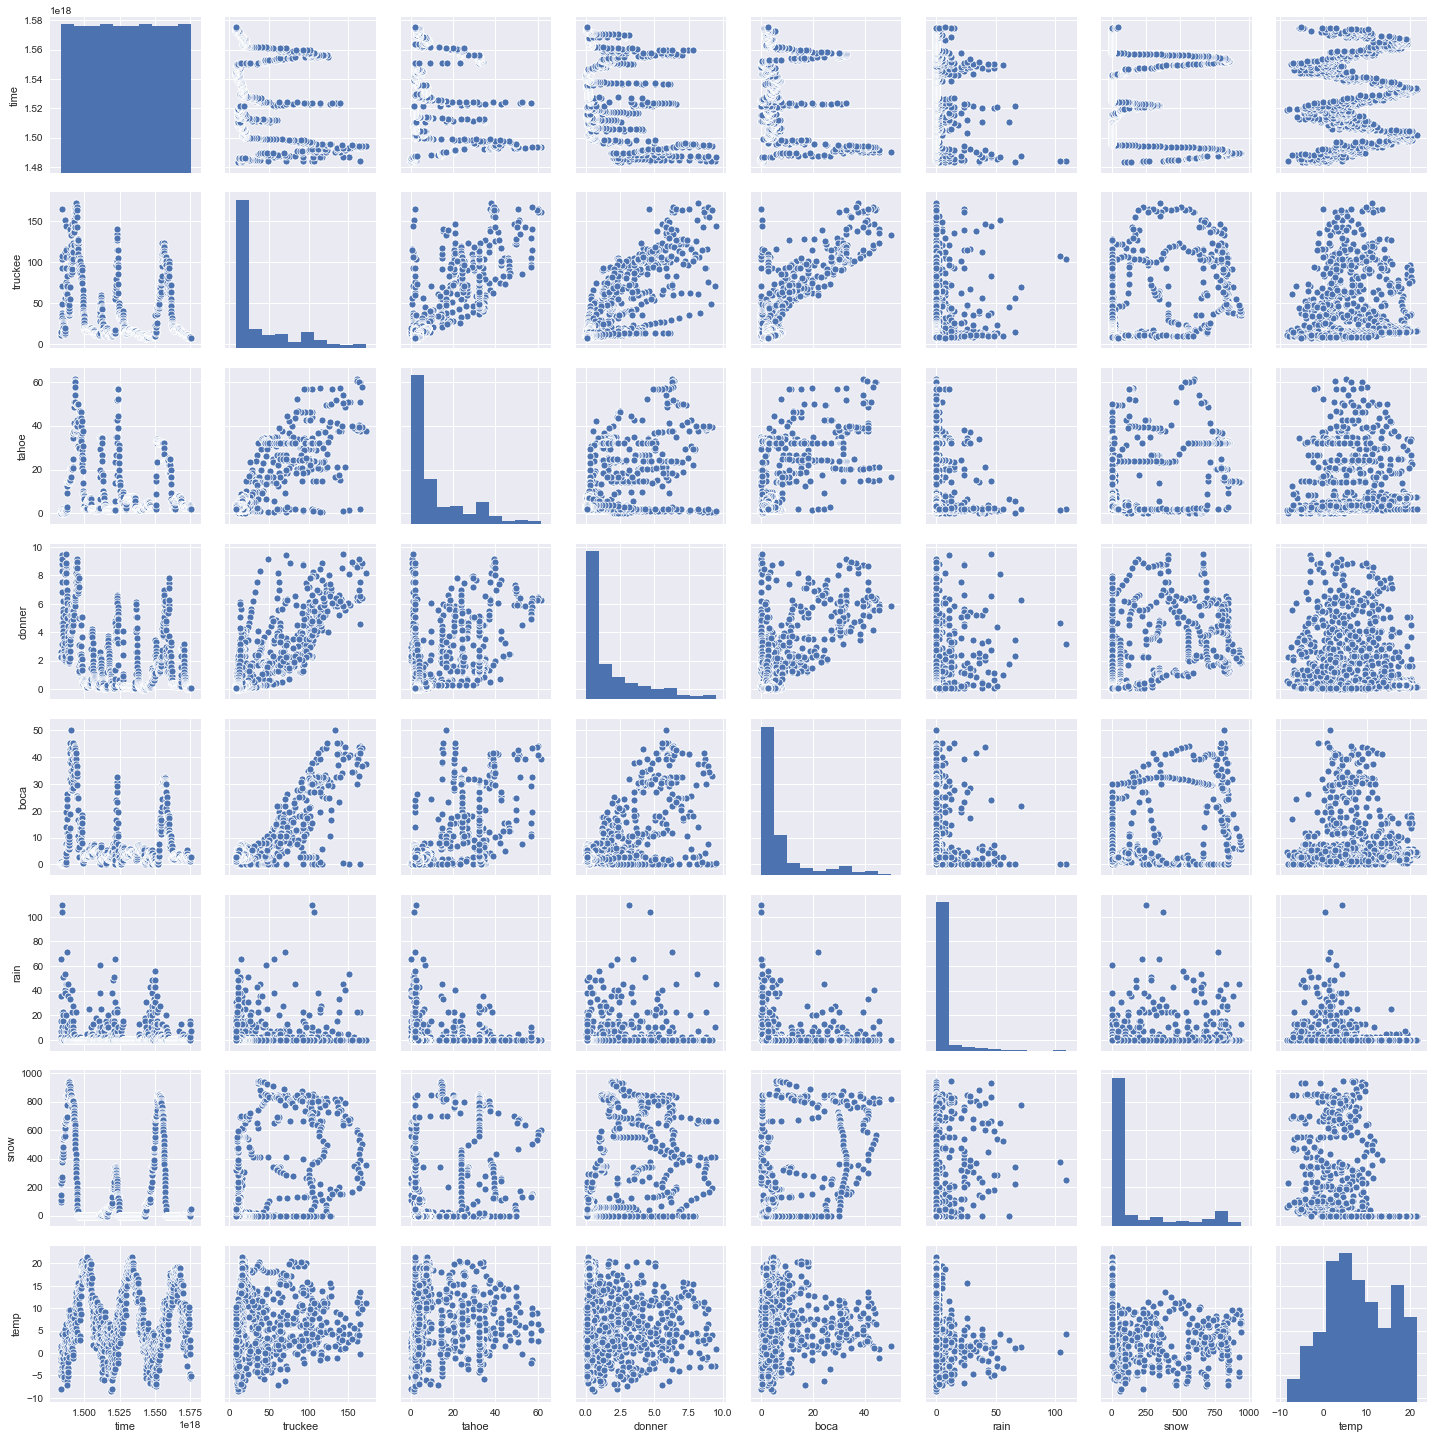

In [5]:
sns.pairplot(df)

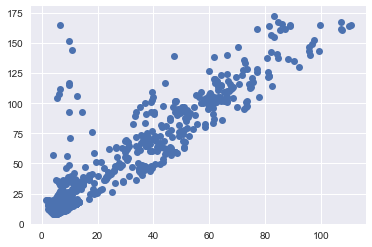

In [6]:
river_input = df.tahoe + df.donner + df.boca
plt.plot(river_input, df.truckee, 'o')

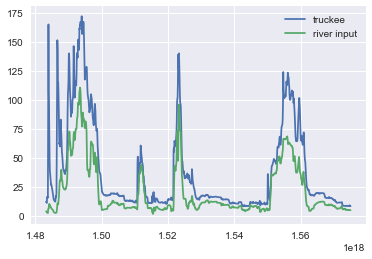

In [7]:
plt.plot(df.time, df.truckee, label='truckee')
plt.plot(df.time, river_input, label='river input')
plt.legend()

In [8]:
dsnow = np.zeros_like(df.snow) 
dsnow[1:] = moving_average(np.diff(df.snow), n=3)
avg_rain = moving_average(df.rain.values, n=3)
avg_temp = moving_average(df.temp.values, n=3)

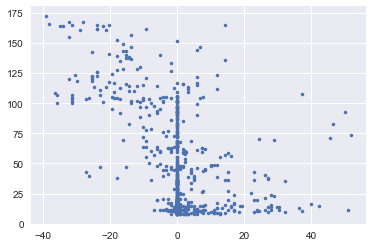

In [9]:
plt.plot(dsnow, df.truckee, '.')

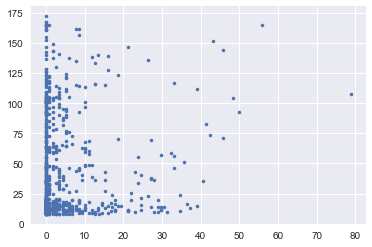

In [10]:
plt.plot(avg_rain, df.truckee, '.')

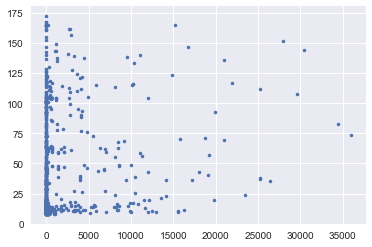

In [11]:
xsnow = df.snow * avg_rain
plt.plot(xsnow, df.truckee, '.')

## Fit the data

In [22]:
X = np.c_[river_input.values, dsnow, avg_rain]
reg = LinearRegression().fit(X, df.truckee.values)

In [23]:
p = reg.predict(X)

In [30]:
print("y = {:.2f}*river_input + {:.4f}*delta_snow_pack + {:.4f}*avg_rain + {:.4f}".format(*reg.coef_, reg.intercept_))

y = 1.41*river_input + -0.8322*delta_snow_pack + 1.4429*avg_rain + 3.5670


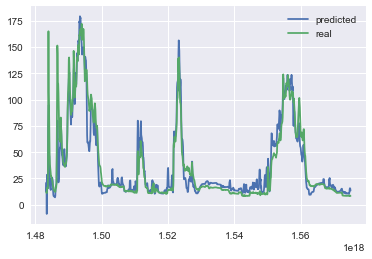

In [31]:
plt.plot(df.time, p, label='predicted')
plt.plot(df.time, df.truckee, label='real')
plt.legend()

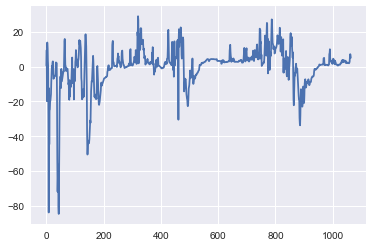

In [32]:
plt.plot(p-df.truckee)

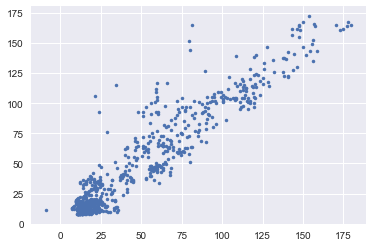

In [27]:
plt.plot(p, df.truckee, '.')

# Bayesian Linear Regression